In [73]:
import pandas as pd;
import numpy as np;
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('/Users/amitjain/Downloads/Housing.csv');

In [79]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


Will try the linear regression on few of the features as of now , we are not focusing on feature selection as of now.
Will take sqft_living,bedrooms, sqft_lot, floors and grade our features, and price as label.

In [90]:
input_data = data[['lotsize']];
output_data = data[['price']];

In [91]:
print(input_data.describe())

            lotsize
count    546.000000
mean    5150.265568
std     2168.158725
min     1650.000000
25%     3600.000000
50%     4600.000000
75%     6360.000000
max    16200.000000


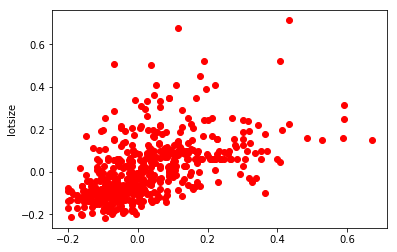

In [92]:
a = np.asarray(data['price']) - float(data['price'].describe().mean());
a_1 = np.transpose(np.asmatrix(a/float(data['price'].describe().max() - data['price'].describe().min())))

feature = 'lotsize'
b = np.asarray(data[feature]) - float(data[feature].describe().mean());
b_1 = np.transpose(np.asmatrix(b/float(data[feature].describe().max() - data[feature].describe().min())))



plt.plot(a_1, b_1,'ro')
plt.ylabel('price')
plt.ylabel(feature)
plt.show()

In [110]:
print(np.shape(np.asmatrix(a_1)))
print(np.shape(np.asmatrix(b_1)))

(546, 1)
(546, 1)


Will use __linear_regression_cost__ and __linear_regression_gd__ and __plot_array__ for simple linear regression

In [132]:
def linear_regression_cost_single_feature(input_data, expected_output, weights, bias):
    predicted_output = np.matmul(input_data, np.transpose(weights)) + bias
    return mean_squared_error(expected_output, predicted_output)

def linear_regression_gd_single_feature(input_data, expected_output, weights, bias, learning_rate):
    m = np.shape(expected_output)[0];
    predicted_output = np.matmul(input_data, np.transpose(weights)) + bias;
    error =  expected_output - predicted_output
    bias_delta = np.sum(error)/m;
    weight_delta = np.sum(np.multiply(error, X))/m;
    return bias - (learning_rate * bias_delta), weights - (learning_rate * weight_delta)

def plot_array(input_array):
    plt.plot(input_array)
    plt.ylabel('values')
    plt.show()

In [133]:
X = np.transpose(np.matrix(data['price']));
print('shape of input ', np.shape(X));
Y = np.transpose(np.matrix(data['lotsize']));
print('shape of expected output ', np.shape(Y));
bias = 0;
W = np.asmatrix(np.zeros(1));
print('Size of weight matrix', np.shape(W));

shape of input  (546, 1)
shape of expected output  (546, 1)
Size of weight matrix (1, 1)


__Trying Linear Regression with intial bias 0 and initial weights 0.__

In [134]:
number_of_iterations = 20
learning_rate = 0.001
cost_array = [None] * number_of_iterations
print('Number of Iterations ', number_of_iterations);
print('Current_learing_rate ', learning_rate);

Number of Iterations  20
Current_learing_rate  0.001


In [135]:
current_bias = bias
current_weight = W
for i in range(0, number_of_iterations):

    cost_array[i] = linear_regression_cost_single_feature(X, Y, current_weight, current_bias)
    print('Cost at ',i, 'is ', round(cost_array[i], 10))
    new_bias, new_weights  = linear_regression_gd_single_feature(X,Y, current_weight, current_bias,learning_rate) 
    current_bias = new_bias
    current_weight = new_weights

Cost at  0 is  31217537.946886446
Cost at  1 is  7.802401863451338e+20
Cost at  2 is  2.235146104177535e+34
Cost at  3 is  6.403000248451888e+47
Cost at  4 is  1.8342609507740024e+61
Cost at  5 is  5.254588638111975e+74
Cost at  6 is  1.5052766480213515e+88
Cost at  7 is  4.3121506613171164e+101
Cost at  8 is  1.235297401998486e+115
Cost at  9 is  3.538743868745336e+128
Cost at  10 is  1.013740346925627e+142
Cost at  11 is  2.90405163273162e+155
Cost at  12 is  8.319207093954121e+168
Cost at  13 is  2.3831947714716338e+182
Cost at  14 is  6.827113755705545e+195
Cost at  15 is  1.9557563146449133e+209
Cost at  16 is  5.6026351678655466e+222
Cost at  17 is  1.6049811824282852e+236
Cost at  18 is  4.597773224149219e+249
Cost at  19 is  1.317119406267436e+263


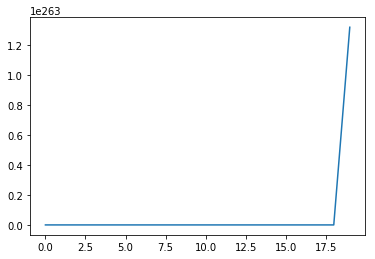

In [131]:
plt.plot(np.asarray(cost_array))